Bedrooms
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [2]:
import pandas as pd

file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['bedrooms'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'bedrooms' existe en el DataFrame
if 'bedrooms' in data.columns:
    # Tipo de dato
    tipo_dato = data['bedrooms'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['bedrooms'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['bedrooms'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['bedrooms'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['bedrooms'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'bedrooms':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'bedrooms' no existe en el DataFrame.")

Columna 'bedrooms':
 - Tipo de dato: float64
 - Cantidad de nulos: 29435
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 39
 - Cantidad de datos totales: 279712


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

Dividir en 10

ANALISIS ESCALA NORMAL

In [3]:
# Cantidad de filas antes de aplicar el filtro
total_antes = data['bedrooms'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores iguales a 0
valores_validos = data['bedrooms'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después de filtrar
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se eliminaron (nulos o 0)
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas en escala natural
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'bedrooms' (escala natural, excluyendo valores 0):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")


Cantidad de valores eliminados (dropeados): 29435

Análisis Cuantitativo de 'bedrooms' (escala natural, excluyendo valores 0):
 - Promedio: 1.52
 - Mínimo: 1.0
 - Máximo: 50.0
 - Desviación estándar: 1.15
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 2.0
 - Q4 (100%): 50.0
 - Varianza: 1.3295923401779792
 - Curtosis (Kurtosis): 428.8930
 - Asimetría (Skewness): 13.2134


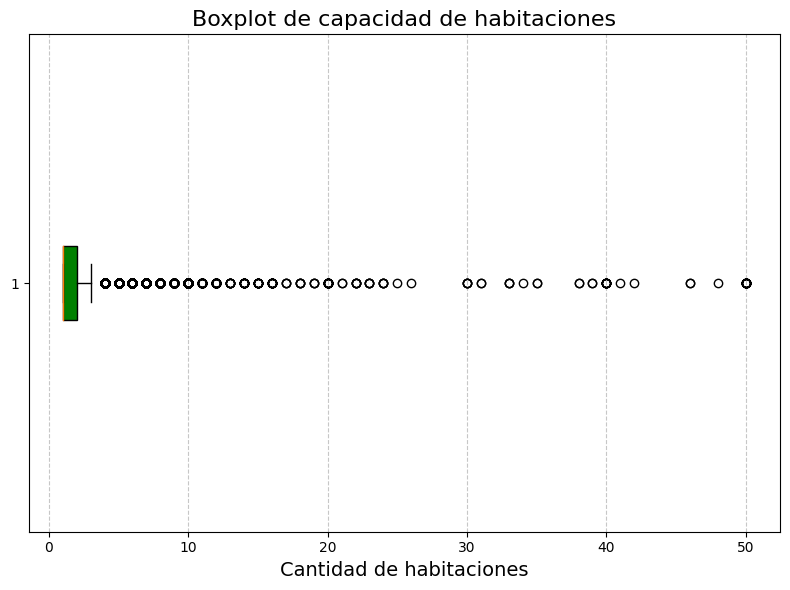

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'review_scores_value' del archivo CSV


# Verificar si la columna 'review_scores_value' existe en el DataFrame
if 'bedrooms' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['bedrooms'].dropna()

    # Crear el gráfico boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_validos, vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Boxplot de capacidad de habitaciones', fontsize=16)
    plt.xlabel('Cantidad de habitaciones', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")

SIN OUTLIERS

In [4]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['bedrooms'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'bedrooms' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 10207

Análisis Cuantitativo de 'bedrooms' (escala natural, sin outliers):
 - Promedio: 1.37
 - Mínimo: 1.0
 - Máximo: 3.0
 - Desviación estándar: 0.62
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 2.0
 - Varianza: 0.3870
 - Curtosis (Kurtosis): 0.9664
 - Asimetría (Skewness): 1.4692


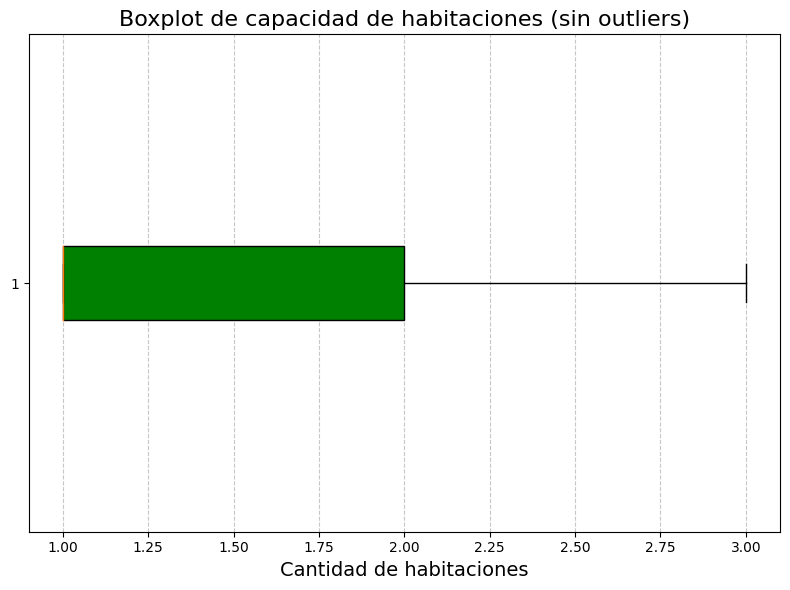

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar si la columna 'accommodates' existe en el DataFrame
if 'bedrooms' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['bedrooms'].dropna()

    # Calcular IQR y límites para eliminar outliers
    q1 = valores_validos.quantile(0.25)
    q3 = valores_validos.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Eliminar outliers
    valores_filtrados = valores_validos[
        (valores_validos >= limite_inferior) & (valores_validos <= limite_superior)
    ]

    # Crear el gráfico boxplot (sin outliers)
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_filtrados, vert=False, patch_artist=True,
                boxprops=dict(facecolor='green'))
    plt.title('Boxplot de capacidad de habitaciones (sin outliers)', fontsize=16)
    plt.xlabel('Cantidad de habitaciones', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'accommodates' no existe en el DataFrame.")


In [4]:
nulos = data['bedrooms'].isna().sum()
ceros = (data['bedrooms'] == 0).sum()
print(f"Nulos: {nulos}")
print(f"Ceros: {ceros}")
print(f"Total eliminados: {nulos + ceros}")


Nulos: 29435
Ceros: 0
Total eliminados: 29435
